# TA & NLP - Assignment 1: Unit 2 and 3

## Filter the data shared according to the classes in target variable and 

do the following activities. (Data Set: EcomReviews_8k)
- Create frequency data frame 
- Plot word clouds for every class in the target variable using 
    - bag of words 
    - tf - idf
    - bigrams
    - trigrams

In [1]:
import re
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\PGCP-DSML RITHEESH V\NLP\TA&NLP-Assignment 1\EcomReviews_8k.csv")

In [3]:
df.head()

,labels,text
0,__label__2,Rose Dawson Malaysia: All must buy the album o...
1,__label__2,a precious resource for Christian contemplatio...
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v..."
3,__label__1,Boring!: This game is based on a great concept...
4,__label__1,Lost in the 70's: The Eurovision song contest ...


In [4]:
df['labels']=df['labels'].replace({'__label__2':1,'__label__1':0})

# Tokenization

In [5]:
def tokenization(text):
    return re.findall(r'\w+',text)

# Stopwords Removal

In [6]:
import nltk
stop_words=nltk.corpus.stopwords.words('English')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
def remove_stopwords(tokens):
    return [t for t in tokens if t.lower() not in stop_words]

# Pipeline Preparation

In [8]:
def prepare(text,pl):
    tokens=text
    for transform in pl:
        tokens=transform(tokens)
    return tokens

In [9]:
pipeline=[str.lower,tokenization,remove_stopwords]

In [10]:
df['tokens']=df['text'].apply(prepare,pl=pipeline)

In [11]:
df

,labels,text,tokens
0,1,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let..."
1,1,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,..."
2,0,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus..."
3,0,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s..."
4,0,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go..."
...,...,...,...
7995,1,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he..."
7996,0,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra..."
7997,1,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book..."
7998,0,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ..."


In [12]:
df['num_tokens']=df['tokens'].apply(len)
df['tex_len']=df['text'].apply(len)

In [13]:
df

,labels,text,tokens,num_tokens,tex_len
0,1,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205
1,1,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655
2,0,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660
3,0,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256
4,0,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511
...,...,...,...,...,...
7995,1,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he...",11,121
7996,0,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra...",13,132
7997,1,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book...",37,435
7998,0,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ...",30,299


# Bag of Words

In [14]:
tokens=df['tokens'][0]
bow=dict.fromkeys(tokens,0)
for i in bow:
    bow[i]=tokens.count(i)

In [15]:
bow

{'rose': 1,
 'dawson': 1,
 'malaysia': 1,
 'must': 1,
 'buy': 1,
 'album': 1,
 'let': 1,
 'talk': 1,
 'love': 1,
 'interesting': 1,
 'information': 1,
 'already': 1,
 'heard': 1,
 'song': 1,
 'heart': 1,
 'go': 1,
 '566': 1,
 'times': 1,
 'believe': 1}

In [16]:
from collections import Counter
counter=Counter(tokens)
print(counter)

Counter({'rose': 1, 'dawson': 1, 'malaysia': 1, 'must': 1, 'buy': 1, 'album': 1, 'let': 1, 'talk': 1, 'love': 1, 'interesting': 1, 'information': 1, 'already': 1, 'heard': 1, 'song': 1, 'heart': 1, 'go': 1, '566': 1, 'times': 1, 'believe': 1})


In [17]:
counter.most_common(10)

[('rose', 1),
 ('dawson', 1),
 ('malaysia', 1),
 ('must', 1),
 ('buy', 1),
 ('album', 1),
 ('let', 1),
 ('talk', 1),
 ('love', 1),
 ('interesting', 1)]

In [18]:
def count_words(df,column='tokens',preprocess=None,min_freq=2):
    def update(doc):
        tokens=doc if preprocess is None else preprocessing(doc)
        counter.update(tokens)
    
    counter=Counter()
    df[column].apply(update)
    
    freq_df=pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])
    freq_df=freq_df.query('freq>@min_freq')
    
    return freq_df.sort_values('freq',ascending=False)

In [19]:
freq_df=count_words(df)

In [20]:
freq_df

,freq
book,4389
one,3070
great,2379
good,2298
like,2245
...,...
bouts,3
bossa,3
ankle,3
pricy,3


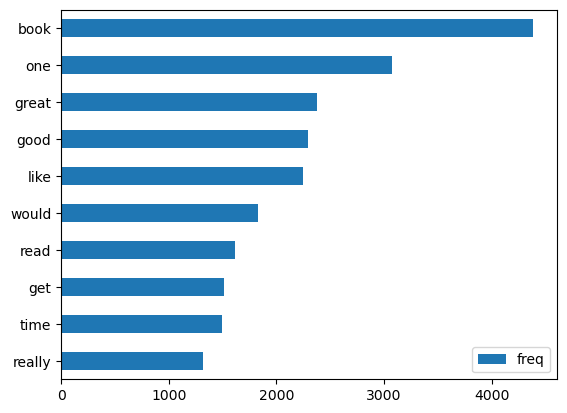

In [21]:
ax=freq_df.head(10).plot(kind='barh')
ax.invert_yaxis()

# Word Cloud

In [22]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

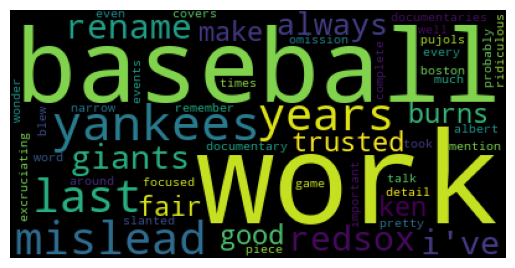

In [23]:
text=df.query("labels==0")['text'].values[0].lower()
wc=WordCloud(max_words=100,stopwords=stop_words)
wc.generate(text)
ax=plt.imshow(wc)
ax=plt.axis('off')

In [24]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    wc = WordCloud(max_font_size=150, max_words=max_words)
    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq
    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
    plt.title(title)
    plt.imshow(wc)
    plt.axis("off")

In [25]:
label_1_df=count_words(df[df['labels']==0])
label_1_df

,freq
book,2168
one,1541
like,1167
would,1108
good,973
...,...
jason,3
beggining,3
competent,3
unstable,3


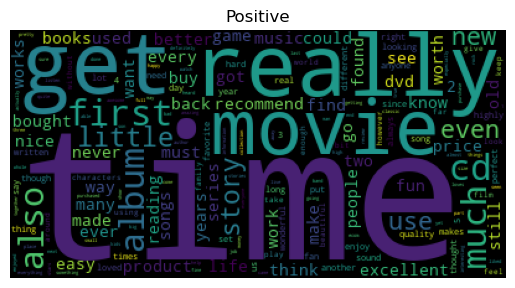

In [26]:
label_1_df=count_words(df[df['labels']==1])
plt.figure()
wordcloud(label_1_df['freq'],title='Positive',max_words=1000,stopwords=label_1_df.head(10).index)

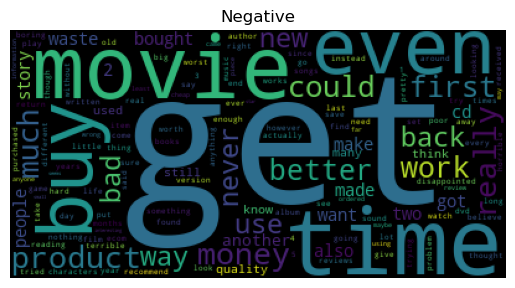

In [27]:
label_0_df=count_words(df[df['labels']==0])
plt.figure()
wordcloud(label_0_df['freq'],title='Negative',max_words=1000,stopwords=label_1_df.head(10).index)

In [28]:
import numpy as np

In [29]:
def compute_idf(df,column='tokens',preprocess=None,min_df=2):
    def update(doc):
        tokens=doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter=Counter()
    df[column].apply(update)
    
    idf_df=pd.DataFrame.from_dict(counter,orient='index',columns=['df'])
    idf_df=idf_df.query('df>@min_df')
    idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1
    freq_df.index.name='token'
    return idf_df.sort_values(by='df',ascending=False)

In [30]:
idf_df=compute_idf(df)

C:\Users\velur\AppData\Local\Temp\ipykernel_17496\2769517236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [31]:
idf_df

,df,idf
one,2279,1.355705
book,2049,1.462090
great,1769,1.609027
good,1749,1.620397
like,1704,1.646463
...,...,...
marco,3,7.988585
exemplary,3,7.988585
guessed,3,7.988585
rooting,3,7.988585


In [32]:
freq_df['tfidf']=freq_df['freq']*idf_df['idf']

In [33]:
freq_df.sort_values(by='tfidf')

,freq,tfidf
token,,
storylines,3,23.965754
salvation,3,23.965754
doggie,3,23.965754
inappropriate,3,23.965754
unsatisfying,3,23.965754
...,...,...
cubic,3,NaN
lather,3,NaN
shrink,3,NaN


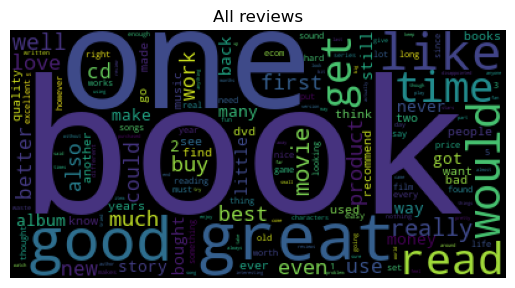

In [34]:
label_1_df=count_words(df[df['labels']==1])
label_0_df=count_words(df[df['labels']==0])

label_1_df['tfidf']=label_1_df['freq']*idf_df['idf']
label_0_df['tfidf']=label_0_df['freq']*idf_df['idf']

wordcloud(freq_df['freq'],title='All reviews')

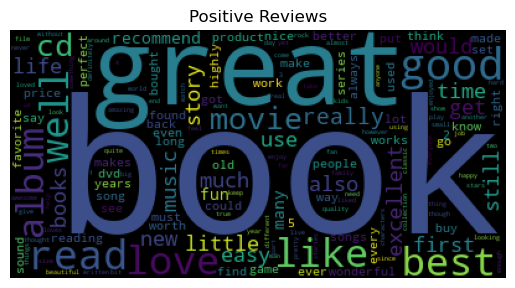

In [35]:
wordcloud(label_1_df['tfidf'],title='Positive Reviews',stopwords = ['one'] )

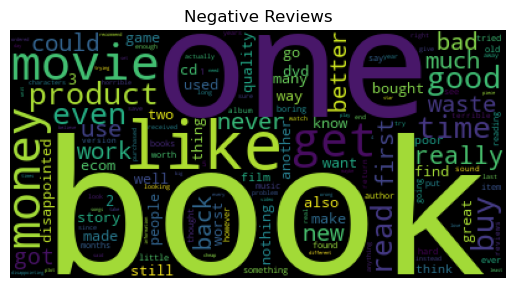

In [36]:
wordcloud(label_0_df['tfidf'],title='Negative Reviews',stopwords = ['would'] )

# Ngrams

> # BIGRAMS

In [37]:
def ngrams(tokens,n=2,sep=' ',stopwords=set()):
    return[sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])if len([t for t in ngram if t in stop_words])==0]

In [38]:
df['bigrams']=df['text'].apply(prepare,pl=[str.lower,tokenization]).apply(ngrams,n=2,stopwords=stop_words)

In [39]:
df

,labels,text,tokens,num_tokens,tex_len,bigrams
0,1,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205,"[rose dawson, dawson malaysia, must buy, alrea..."
1,1,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655,"[precious resource, christian contemplation, b..."
2,0,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660,"[redsox yankees, always trusted, trusted ken, ..."
3,0,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256,"[great concept, falls short, really bad, contr..."
4,0,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511,"[eurovision song, song contest, good songs, so..."
...,...,...,...,...,...,...
7995,1,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he...",11,121,"[helpful although, gram index, tone arm, stylu..."
7996,0,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra...",13,132,"[already scrached, tryed playing, songs wouldn..."
7997,1,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book...",37,435,"[great insight, cool breeze, summer day, veter..."
7998,0,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ...",30,299,"[reading 2, 2 reviews, skipped cds, 4 months, ..."


In [40]:
idf_df=compute_idf(df,column='bigrams',min_df=10)

C:\Users\velur\AppData\Local\Temp\ipykernel_17496\2769517236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [41]:
idf_df

,df,idf
year old,148,4.089985
highly recommend,128,4.235167
much better,127,4.243010
even though,103,4.452468
great book,98,4.502229
...,...,...
might want,11,6.689302
ever written,11,6.689302
nice book,11,6.689302
pretty well,11,6.689302


In [42]:
label_1_df_bigrams=count_words(df[df['labels']==1],column='bigrams')

In [43]:
label_0_df_bigrams=count_words(df[df['labels']==0],column='bigrams')

In [44]:
label_1_df_bigrams

,freq
highly recommend,115
year old,106
great book,97
well written,79
would recommend,73
...,...
many uses,3
quality sound,3
engaging read,3
really think,3


In [45]:
label_0_df_bigrams

,freq
much better,77
year old,63
even though,52
one star,48
poor quality,48
...,...
law order,3
go somewhere,3
would come,3
one unless,3


In [46]:
label_1_df_bigrams['tfidf']=label_1_df_bigrams['freq']*idf_df['idf']

In [47]:
label_0_df_bigrams['tfidf']=label_0_df_bigrams['freq']*idf_df['idf']

In [48]:
label_1_df_bigrams

,freq,tfidf
highly recommend,115,487.044154
year old,106,433.538362
great book,97,436.716246
well written,79,362.403585
would recommend,73,334.072624
...,...,...
many uses,3,NaN
quality sound,3,NaN
engaging read,3,NaN
really think,3,NaN


In [49]:
label_0_df_bigrams

,freq,tfidf
much better,77,326.711750
year old,63,257.669026
even though,52,231.528327
one star,48,249.378073
poor quality,48,254.544345
...,...,...
law order,3,NaN
go somewhere,3,NaN
would come,3,NaN
one unless,3,NaN


In [50]:
label_1_df_ngram=pd.concat([label_1_df,label_1_df_bigrams])

In [51]:
label_0_df_ngram=pd.concat([label_0_df,label_0_df_bigrams])

In [52]:
label_1_df_ngram

,freq,tfidf
book,2221,3247.301162
great,1841,2962.218940
one,1529,2072.872626
good,1325,2147.026483
like,1078,1774.887236
...,...,...
many uses,3,NaN
quality sound,3,NaN
engaging read,3,NaN
really think,3,NaN


In [53]:
label_0_df_ngram

,freq,tfidf
book,2168,3169.810410
one,1541,2089.141084
like,1167,1921.422453
would,1108,1972.977287
good,973,1576.646617
...,...,...
law order,3,NaN
go somewhere,3,NaN
would come,3,NaN
one unless,3,NaN


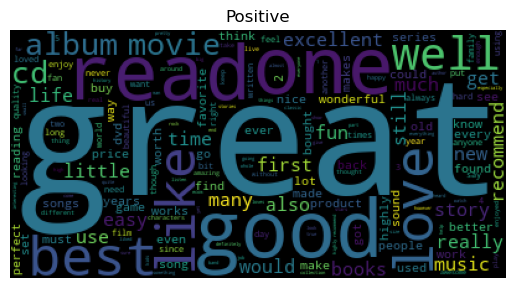

In [54]:
wordcloud(label_1_df_ngram['tfidf'],title='Positive',\
          stopwords=['book'])

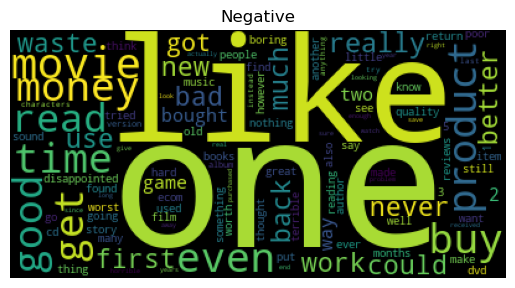

In [55]:
wordcloud(label_0_df_ngram['tfidf'],title='Negative',\
          stopwords=['would','book'])

# TRIGRAMS

In [56]:
def ngrams(tokens,n=3,sep=' ',stopwords=set()):
    return[sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])if len([t for t in ngram if t in stop_words])==0]

In [57]:
df['trigrams']=df['text'].apply(prepare,pl=[str.lower,tokenization]).apply(ngrams,n=3,stopwords=stop_words)

In [58]:
df

,labels,text,tokens,num_tokens,tex_len,bigrams,trigrams
0,1,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205,"[rose dawson, dawson malaysia, must buy, alrea...","[rose dawson malaysia, 566 times believe]"
1,1,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655,"[precious resource, christian contemplation, b...","[love without soft, without soft pedalling, bu..."
2,0,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660,"[redsox yankees, always trusted, trusted ken, ...","[always trusted ken, trusted ken burns, good f..."
3,0,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256,"[great concept, falls short, really bad, contr...","[control options pass, roller coaster tycoon, ..."
4,0,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511,"[eurovision song, song contest, good songs, so...","[eurovision song contest, song everyone knows,..."
...,...,...,...,...,...,...,...
7995,1,Very Helpful: Although I have a gram index on ...,"[helpful, although, gram, index, tone, arm, he...",11,121,"[helpful although, gram index, tone arm, stylu...",[]
7996,0,Scratched up cd: When I got this cd and played...,"[scratched, cd, got, cd, played, already, scra...",13,132,"[already scrached, tryed playing, songs wouldn...","[songs wouldnyt even, wouldnyt even play]"
7997,1,"...in a few words, But Great Insight!: I was i...","[words, great, insight, intrigued, title, book...",37,435,"[great insight, cool breeze, summer day, veter...","[well worth remembering, worth remembering whe..."
7998,0,You get what you pay for: I bought this after ...,"[get, pay, bought, reading, 2, reviews, ecom, ...",30,299,"[reading 2, 2 reviews, skipped cds, 4 months, ...","[reading 2 reviews, office sounds great, sound..."


In [59]:
idf_df_trigram=compute_idf(df,column='trigrams',min_df=10)

C:\Users\velur\AppData\Local\Temp\ipykernel_17496\2769517236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf']=np.log(len(df)/idf_df['df'])+0.1


In [60]:
idf_df_trigram

,df,idf
would highly recommend,23,5.951703
year old son,21,6.042674
2 year old,17,6.253983
5 year old,16,6.314608
worth every penny,16,6.314608
3 year old,13,6.522247
4 year old,13,6.522247
year old daughter,12,6.602290
buy another one,11,6.689302
2 1 2,11,6.689302


In [61]:
label_1_df_trigrams=count_words(df[df['labels']==1],column='trigrams')

In [62]:
label_0_df_trigrams=count_words(df[df['labels']==0],column='trigrams')

In [63]:
label_1_df_trigrams

,freq
worth every penny,17
would highly recommend,17
5 year old,14
year old son,14
2 year old,13
...,...
last two years,3
world war ii,3
money well spent,3
buy another one,3


In [64]:
label_0_df_trigrams

,freq
year old son,8
never buy another,8
buy another one,8
really looking forward,8
2 year old,7
...,...
stay far away,3
platano records edition,3
much better book,3
partially hydrogenated soybean,3


In [65]:
label_1_df_trigrams['tfidf']=label_1_df_trigrams['freq']*idf_df_trigram['idf']

In [66]:
label_0_df_trigrams['tfidf']=label_0_df_trigrams['freq']*idf_df_trigram['idf']

In [67]:
label_1_df_trigrams

,freq,tfidf
worth every penny,17,107.348338
would highly recommend,17,101.178944
5 year old,14,88.404513
year old son,14,84.597441
2 year old,13,81.301785
...,...,...
last two years,3,NaN
world war ii,3,NaN
money well spent,3,NaN
buy another one,3,20.067905


In [68]:
label_0_df_trigrams

,freq,tfidf
year old son,8,48.341395
never buy another,8,NaN
buy another one,8,53.514412
really looking forward,8,NaN
2 year old,7,43.777884
...,...,...
stay far away,3,NaN
platano records edition,3,NaN
much better book,3,NaN
partially hydrogenated soybean,3,NaN


In [69]:
label_1_df_ngram=pd.concat([label_1_df,label_1_df_trigrams])

In [70]:
label_0_df_ngram=pd.concat([label_1_df,label_1_df_trigrams])

In [71]:
label_1_df_ngram

,freq,tfidf
book,2221,3247.301162
great,1841,2962.218940
one,1529,2072.872626
good,1325,2147.026483
like,1078,1774.887236
...,...,...
last two years,3,NaN
world war ii,3,NaN
money well spent,3,NaN
buy another one,3,20.067905


In [72]:
label_0_df_ngram

,freq,tfidf
book,2221,3247.301162
great,1841,2962.218940
one,1529,2072.872626
good,1325,2147.026483
like,1078,1774.887236
...,...,...
last two years,3,NaN
world war ii,3,NaN
money well spent,3,NaN
buy another one,3,20.067905


# Inference

- The positive reviews has the following keywords
    - Great , Good , best , one , read
    


- The negative reviews has the following keywords
    - one, like ,even , much , movie